In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR


In [2]:
# import csv dataset for loading
df=pd.read_csv("C:/Users/ranje/ML assignmnets/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [4]:
df.iloc[30:40]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0
31,32,2,honda civic cvcc,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855.0
32,33,1,honda civic,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399.0
33,34,1,honda accord cvcc,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529.0
34,35,1,honda civic cvcc,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0
35,36,0,honda accord lx,gas,std,four,sedan,fwd,front,96.5,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295.0
36,37,0,honda civic 1500 gl,gas,std,four,wagon,fwd,front,96.5,...,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295.0
37,38,0,honda accord,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.0
38,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0
39,40,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845.0


In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# change the object into integer format
df.doornumber.unique()


array(['two', 'four'], dtype=object)

In [9]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [10]:
# change object into int
ob_to_int = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
df['doornumber']= df['doornumber'].map(ob_to_int)
df['cylindernumber']=df['cylindernumber'].map(ob_to_int)

In [11]:
df.doornumber.dtype

dtype('int64')

In [12]:
df.cylindernumber.dtype

dtype('int64')

In [13]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
df.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [15]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:

# Assuming your DataFrame is called df
df['CarName'] = df['CarName'].str.lower().str.strip()

# Fix common misspellings in brand names
corrections = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

# Extract brand from CarName
df['brand'] = df['CarName'].apply(lambda x: corrections.get(x.split()[0], x.split()[0]))

# Extract model (everything after the brand)
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else '')




In [17]:
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
df.model.unique()

array(['giulia', 'stelvio', 'quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'mu-x', 'd-max', 'd-max v-cross', 'xj', 'xf', 'xk',
       'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc', 'rx-7 gs',
       'glc 4', 'glc custom l', 'glc custom', 'electra 225 custom',
       'century luxus (sw)', 'century', 'skyhawk', 'opel isuzu deluxe',
       'skylark', 'century special', 'regal sport coupe (turbo)',
       'cougar', 'mirage', 'lancer', 'outlander', 'g4', 'mirage g4',
       'montero', 'pajero', 'versa', 'gt-r', 'rogue', 'latio', 'titan',
       'leaf', 'juke', 'note', 'clipper', '

In [19]:
df.drop(columns=['CarName','car_ID',],inplace =True)

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,quadrifoglio
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [22]:
target_value = 'price'
categorical_cols = df.select_dtypes(include='object').columns
num_colms = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_value)



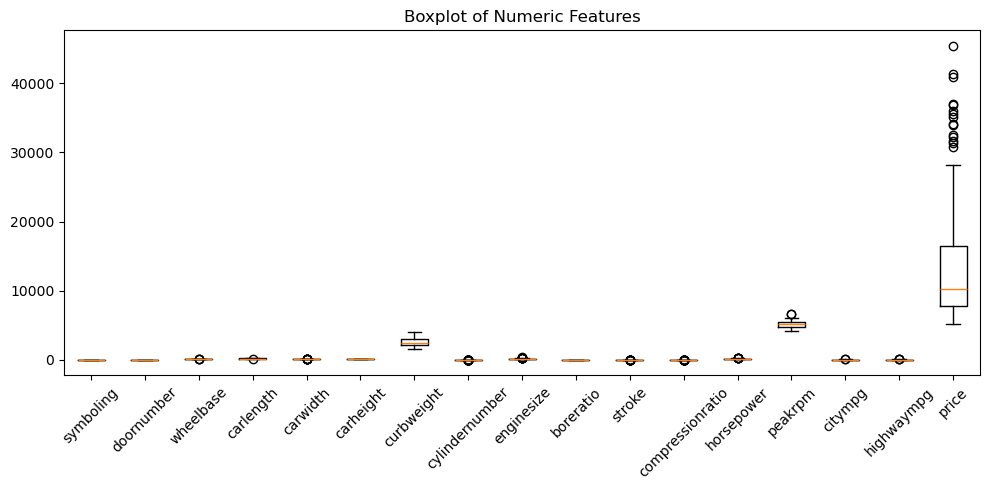

In [23]:

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot boxplot for all numeric columns
plt.figure(figsize=(10,5 ))
plt.boxplot(numeric_df.values)
plt.xticks(range(1, numeric_df.shape[1] + 1), numeric_df.columns, rotation=45)
plt.title("Boxplot of Numeric Features")
plt.tight_layout()
plt.show()


In [24]:
from scipy.stats import zscore

def count_outliers_zscore(df, num_colms, threshold=3):
    outlier_counts = {}
    total_outliers = 0

    for col in num_colms:
        z_scores = zscore(df[col].dropna())  # dropna to avoid NaN issues
        outliers = np.abs(z_scores) > threshold
        count = np.sum(outliers)

        outlier_counts[col] = int(count)
        total_outliers += int(count)

    return outlier_counts, total_outliers


outliers_z, total_z = count_outliers_zscore(df, num_colms)
print("Outliers using Z-score:")
print(outliers_z)
print(f"Total outliers: {total_z}")


Outliers using Z-score:
{'symboling': 0, 'doornumber': 0, 'wheelbase': 1, 'carlength': 0, 'carwidth': 0, 'carheight': 0, 'curbweight': 0, 'cylindernumber': 6, 'enginesize': 5, 'boreratio': 0, 'stroke': 3, 'compressionratio': 9, 'horsepower': 2, 'peakrpm': 2, 'citympg': 3, 'highwaympg': 2}
Total outliers: 33


In [25]:
from scipy.stats import zscore
import numpy as np

def remove_outliers_zscore(df, num_cols, threshold=3):
    # Compute Z-scores for the specified columns
    z_scores = df[num_cols].apply(zscore)
    
    # Identify rows where all Z-scores are within the threshold
    mask = (np.abs(z_scores) < threshold).all(axis=1)
    
    # Filter DataFrame
    cleaned_df = df[mask].copy()
    
    # Count how many were removed
    removed_count = df.shape[0] - cleaned_df.shape[0]
    
    return cleaned_df, removed_count


In [26]:
# Count outliers before removal
outliers_z, total_z = count_outliers_zscore(df, num_colms)
print("Outliers using Z-score (BEFORE removal):")
print(outliers_z)
print(f"Total outliers: {total_z}")

# Remove outliers
df_cleaned, removed_total = remove_outliers_zscore(df, num_colms)
print(f"\nTotal outliers removed: {removed_total}")
print(f"New DataFrame shape: {df_cleaned.shape}")


Outliers using Z-score (BEFORE removal):
{'symboling': 0, 'doornumber': 0, 'wheelbase': 1, 'carlength': 0, 'carwidth': 0, 'carheight': 0, 'curbweight': 0, 'cylindernumber': 6, 'enginesize': 5, 'boreratio': 0, 'stroke': 3, 'compressionratio': 9, 'horsepower': 2, 'peakrpm': 2, 'citympg': 3, 'highwaympg': 2}
Total outliers: 33

Total outliers removed: 25
New DataFrame shape: (180, 26)


In [27]:
df_cleaned

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,quadrifoglio
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,gas,turbo,4,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,4,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0,volvo,diesel
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl


In [28]:
#outliers were in price .

Q1 =  df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR =  Q3-Q1

lower_bond = Q1-1.5*IQR
upper_bond = Q3+1.5*IQR

new_df = df_cleaned[(df_cleaned['price']>=lower_bond ) & (df_cleaned['price']<=upper_bond)]

print('Before removal outliers',df_cleaned.shape)
print('After removal outliers',new_df.shape)

Before removal outliers (180, 26)
After removal outliers (173, 26)


In [29]:
new_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,quadrifoglio
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,gas,turbo,4,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,4,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0,volvo,diesel
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl


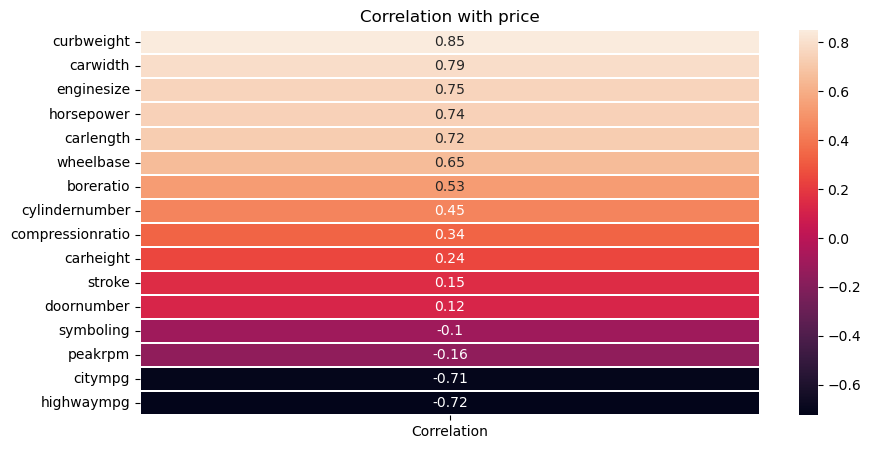

In [30]:
# using Correlation finding the numerical columns with target for feature_selection
corr =  new_df[num_colms].corrwith(new_df[target_value])
corr_df =corr.to_frame('Correlation').sort_values(by='Correlation',ascending = False)
plt.figure(figsize =(10,5))
sns.heatmap(corr_df,annot =True,linewidths= 0.2)
plt.title('Correlation with price')
plt.show()
                                        


In [31]:
# selecting the highest correlation values
threshold_vlaue = 0.5
corr_features = corr[corr.abs()>threshold_vlaue].sort_values(ascending =False)
print(corr_features)

curbweight    0.849092
carwidth      0.787682
enginesize    0.751819
horsepower    0.742159
carlength     0.723939
wheelbase     0.654062
boreratio     0.533658
citympg      -0.711908
highwaympg   -0.724758
dtype: float64


Encording data for preprocessing using the Standard scaler

In [32]:
# Encording the datasets.

categorical_cols

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'brand', 'model'],
      dtype='object')

In [33]:
encord_df=pd.get_dummies(new_df,columns=categorical_cols,drop_first=True)
corr_matrix = encord_df.corr()
correlation_with_price = corr_matrix['price'].sort_values(ascending = False)
print('Top feature names',correlation_with_price)

Top feature names price              1.000000
curbweight         0.849092
carwidth           0.787682
enginesize         0.751819
horsepower         0.742159
                     ...   
fueltype_gas      -0.390666
drivewheel_fwd    -0.600800
fuelsystem_2bbl   -0.630284
citympg           -0.711908
highwaympg        -0.724758
Name: price, Length: 176, dtype: float64


In [34]:
# selecting the important features in fixed value
fixed_value =0.5
imp_feat = correlation_with_price[abs(correlation_with_price)>=fixed_value].index.tolist()
imp_feat

['price',
 'curbweight',
 'carwidth',
 'enginesize',
 'horsepower',
 'carlength',
 'wheelbase',
 'drivewheel_rwd',
 'fuelsystem_mpfi',
 'boreratio',
 'drivewheel_fwd',
 'fuelsystem_2bbl',
 'citympg',
 'highwaympg']

In [35]:
feat_df =encord_df[imp_feat]
feat_df

,price,curbweight,carwidth,enginesize,horsepower,carlength,wheelbase,drivewheel_rwd,fuelsystem_mpfi,boreratio,drivewheel_fwd,fuelsystem_2bbl,citympg,highwaympg
0,13495.0,2548,64.1,130,111,168.8,88.6,True,True,3.47,False,False,21,27
1,16500.0,2548,64.1,130,111,168.8,88.6,True,True,3.47,False,False,21,27
2,16500.0,2823,65.5,152,154,171.2,94.5,True,True,2.68,False,False,19,26
3,13950.0,2337,66.2,109,102,176.6,99.8,False,True,3.19,True,False,24,30
4,17450.0,2824,66.4,136,115,176.6,99.4,False,True,3.19,False,False,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,18950.0,3157,67.2,130,162,188.8,104.3,True,True,3.62,False,False,17,22
200,16845.0,2952,68.9,141,114,188.8,109.1,True,True,3.78,False,False,23,28
201,19045.0,3049,68.8,141,160,188.8,109.1,True,True,3.78,False,False,19,25
202,21485.0,3012,68.9,173,134,188.8,109.1,True,True,3.58,False,False,18,23


In [36]:
# seperating the x and y
X = feat_df.drop('price',axis=1)
print(X)
y = feat_df['price']
print('The target value',y)

     curbweight  carwidth  enginesize  horsepower  carlength  wheelbase  \
0          2548      64.1         130         111      168.8       88.6   
1          2548      64.1         130         111      168.8       88.6   
2          2823      65.5         152         154      171.2       94.5   
3          2337      66.2         109         102      176.6       99.8   
4          2824      66.4         136         115      176.6       99.4   
..          ...       ...         ...         ...        ...        ...   
199        3157      67.2         130         162      188.8      104.3   
200        2952      68.9         141         114      188.8      109.1   
201        3049      68.8         141         160      188.8      109.1   
202        3012      68.9         173         134      188.8      109.1   
204        3062      68.9         141         114      188.8      109.1   

     drivewheel_rwd  fuelsystem_mpfi  boreratio  drivewheel_fwd  \
0              True             

In [37]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


Linear Regression

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict_lin = lin_reg.predict(X_test)

[11802.87847185  6776.29087346 19664.76062334 21277.57880695
 12379.2443043   7420.49716563 13258.92806513  5763.31023224
 11654.15404167 16592.5491963   7613.65410844  6229.56909422
  6197.09282799  8929.6043704   8272.37252999 17194.56331475
 11404.33660917 15240.98629907  9705.71193846 18445.65692996
 17196.11420375  6502.64929416 14982.77820149  8279.26362282
 10019.4884845   8848.13767821 13923.55228767  9178.50407821
  5719.33249964 13896.0723701   8058.04262425  6633.96814447
 15589.26555591  9770.59409254 12476.67310297]


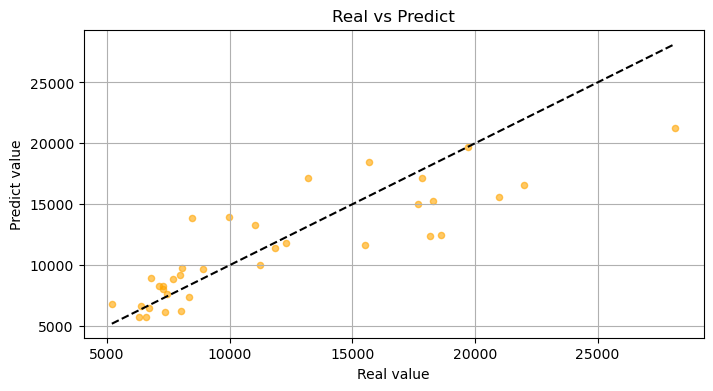

In [40]:
print(y_predict_lin)

# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_lin,color ='orange',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

In [43]:
evaluate_model(y_test, y_predict_lin, 'LinearRegression')

LinearRegression Performance:
MAE: 2221.1979083341043
MSE: 8775482.725952893
R2 Score: 0.7278625641212159




Decision Tree

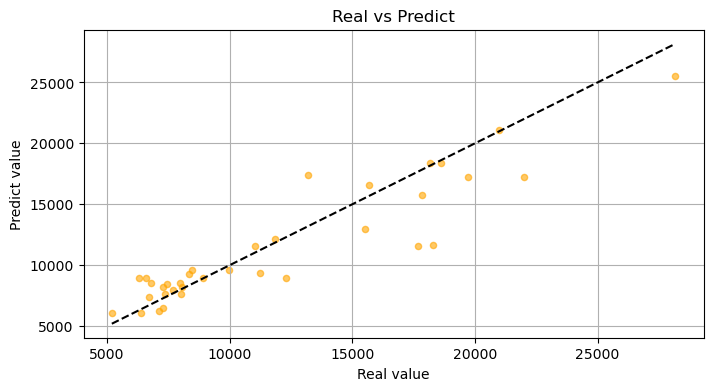

In [45]:
DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(X_train,y_train)
y_predict_dtr = DTR.predict(X_test)
# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_dtr,color ='orange',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [46]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

In [47]:
evaluate_model(y_test, y_predict_dtr, 'DecisionTreeRegressor')

DecisionTreeRegressor Performance:
MAE: 1585.2047714285716
MSE: 5295315.426682543
R2 Score: 0.8357864054446897




RandomForestRegressor

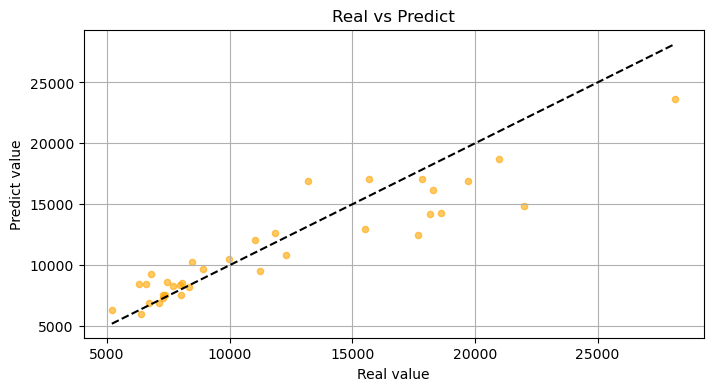

In [49]:
RFR = RandomForestRegressor(n_estimators=100,random_state=42)
RFR.fit(X_train,y_train)
y_predict_rfr = RFR.predict(X_test)
# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_rfr,color ='orange',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [50]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_predict_rfr, 'RandomForestRegressor')

RandomForestRegressor Performance:
MAE: 1740.5071285714287
MSE: 5750807.570515777
R2 Score: 0.8216610897262605




SVR

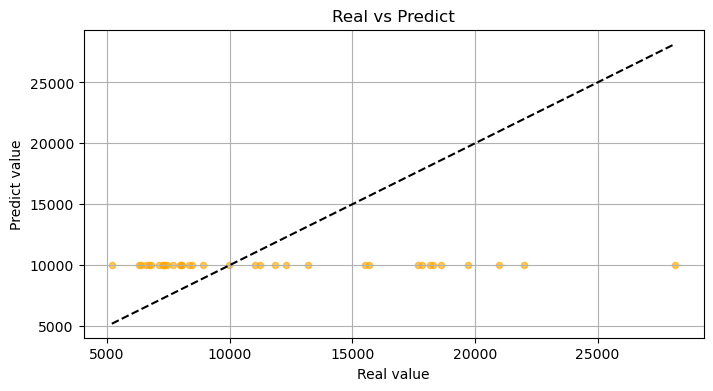

In [52]:
svr = SVR(kernel='rbf',C= 1.0,epsilon=0.2)
svr.fit(X_train,y_train)
y_predict_svr = svr.predict(X_test)
# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_svr,color ='orange',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [53]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_predict_svr, 'SVR')

SVR Performance:
MAE: 4576.46449028669
MSE: 35594279.1631287
R2 Score: -0.10381800818320874




Gradient Boosting Regressor

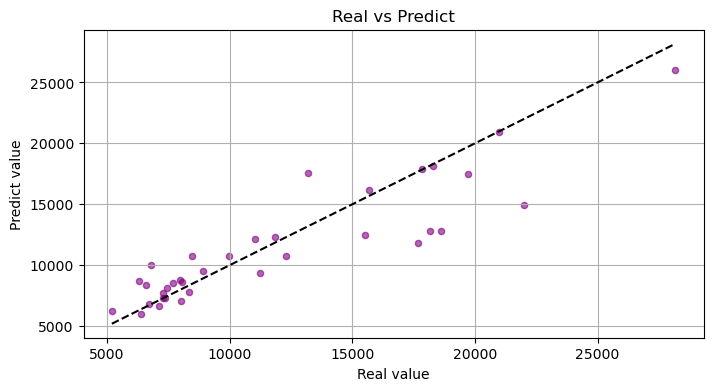

In [55]:
GBR = GradientBoostingRegressor(n_estimators=100,random_state=42)
GBR.fit(X_train,y_train)
y_predict_gbr=GBR.predict(X_test)
# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_gbr,color ='purple',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [56]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_predict_gbr, 'GradientBoostingRegressor')

GradientBoostingRegressor Performance:
MAE: 1694.2470366312648
MSE: 6374414.943943625
R2 Score: 0.80232233459455




Model Evaluation 

In [58]:


results = {
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'GradientBoostingRegressor', 'SVR'],
    'MAE': [
        mean_absolute_error(y_test, y_predict_lin),
        mean_absolute_error(y_test, y_predict_rfr),
        mean_absolute_error(y_test, y_predict_dtr),
        mean_absolute_error(y_test, y_predict_gbr),
        mean_absolute_error(y_test, y_predict_svr)
    ],
    'MSE': [
        mean_squared_error(y_test, y_predict_lin),
        mean_squared_error(y_test, y_predict_rfr),
        mean_squared_error(y_test, y_predict_dtr),
        mean_squared_error(y_test, y_predict_gbr),
        mean_squared_error(y_test, y_predict_svr)
    ],
    'R2 Score': [
        r2_score(y_test, y_predict_lin),
        r2_score(y_test, y_predict_rfr),
        r2_score(y_test, y_predict_dtr),
        r2_score(y_test, y_predict_gbr),
        r2_score(y_test, y_predict_svr)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)


                       Model          MAE           MSE  R2 Score
0          Linear Regression  2221.197908  8.775483e+06  0.727863
1              Random Forest  1740.507129  5.750808e+06  0.821661
2              Decision Tree  1585.204771  5.295315e+06  0.835786
3  GradientBoostingRegressor  1694.247037  6.374415e+06  0.802322
4                        SVR  4576.464490  3.559428e+07 -0.103818


Findings after the evaluation:The Decision tree has shown best model for predicting and at the mean time the Random Forest
rate of R2 is better but there is a little variations. While looking into the SVM the R2 score is going to negative and 
also worst model ,through visualaization it shows as base line ,there no such kinds of variations in features.
Moreover, LinearRegression  and GradientBoostingRegressor is in average model for analysing.

4. Feature Importance Analysis 

In [60]:
fia = DTR.feature_importances_ 
feat= X_train.columns

feat_imp = pd.DataFrame({'feature': feat, 'Value': fia})
feat_imp = feat_imp.sort_values(by='Value', ascending=False)
print(feat_imp)

# Explain through Visualization



            feature     Value
0        curbweight  0.639807
3        horsepower  0.132841
1          carwidth  0.080568
12       highwaympg  0.055556
8         boreratio  0.027673
11          citympg  0.027445
5         wheelbase  0.023566
4         carlength  0.007185
7   fuelsystem_mpfi  0.004953
2        enginesize  0.000251
9    drivewheel_fwd  0.000153
6    drivewheel_rwd  0.000003
10  fuelsystem_2bbl  0.000000


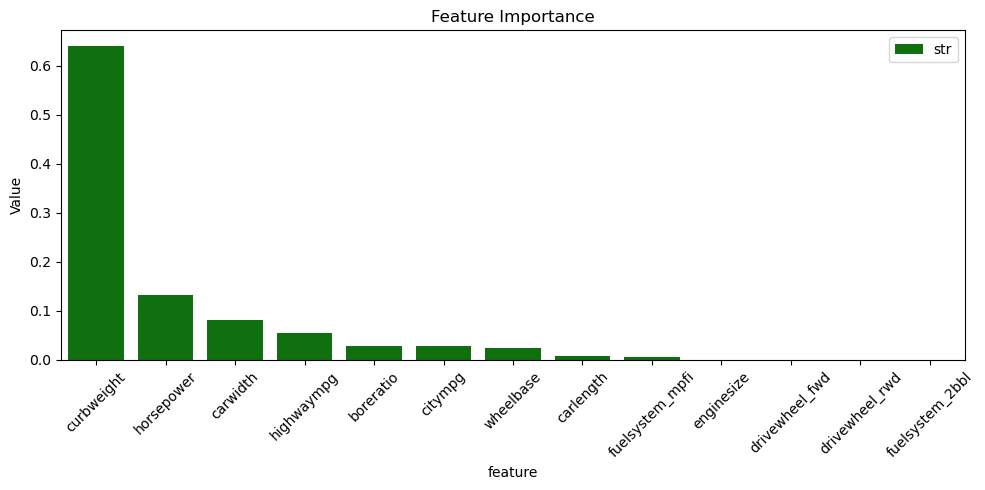

In [61]:
plt.figure(figsize=(10, 5))
sns.barplot(data=feat_imp, x='feature', y='Value', label='str', color='green')
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


After feature importance analysis: The result shows that 'curbweight' has the height important feature while comparing with 
other features.it is around (0.64)

5. Hyperparameter Tuning 

In [73]:
from sklearn.model_selection import GridSearchCV
grid = {
    "n_estimators":[100,200,300],
    "max_depth": [None, 10, 20],      # Depth of each tree
    "min_samples_split": [2, 5, 10], # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4]    # Minimum samples required at a leaf node
}


In [75]:
rfr_model = RandomForestRegressor(random_state=42)
gridcv = GridSearchCV(rfr_model,grid,cv=5,scoring ='r2',n_jobs=1)
gridcv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [77]:
print("Best Hyperparameters:", gridcv.best_params_)
print("Best R² Score:", gridcv.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.8305694432692514


In [79]:
# Train Random Forest with best parameters
best_rfr_model = RandomForestRegressor(**gridcv.best_params_, random_state=42)
best_rfr_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rfr_model = best_rfr_model.predict(X_test)

# Evaluate

print("New Random Forest Performance:")
print("R² Score:", r2_score(y_test, y_pred_best_rfr_model))
print("MSE:", mean_squared_error(y_test, y_pred_best_rfr_model))
print("MAE:", mean_absolute_error(y_test, y_pred_best_rfr_model))

New Random Forest Performance:
R² Score: 0.8214731872072716
MSE: 5756866.771096639
MAE: 1757.5152357142858


Findings: we can see the varaiations in R2_score using in RandomForestRegressor, Before tuning the model around 82% is R2 score 
but in MSE and MAE ther is slightly variations the errors has been increased. Meanwhile, After training and predictions using 
the R2 score we can get perfect result.
